# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
import math

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

url = "http://api.openweathermap.org/data/2.5/weather?"

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

616

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#creating the query url
url="http://api.openweathermap.org/data/2.5/weather?"
query_url = f"{url}appid={api_key}&q={cities}"

response = requests.get(query_url)
   
print(f"{url}appid={api_key}&q={'hilo'}")

http://api.openweathermap.org/data/2.5/weather?appid=55ff3d7be03ad921bb1278d90fddc233&q=hilo


In [6]:

#spliting the cities data into multiple lists
num_of_lists = math.ceil(len(cities)/50)
print(num_of_lists)



13


In [17]:
#for citi in cities
#creating bins to place first 50 sets in each bin
city_name=[]
cloudiness=[]
country=[]
date=[]
humidity=[]
lat = []
lng = []
max_temp =[]
wind_speed=[]
temp=[]
row=0
column=0
bin={}
MAX_CITY_PER_BIN=50

print("Beginning Data Retrieval")     
print("-----------------------------")

for city in cities:
    try:
       #response = requests.get(f"{url}&q={city}").json()
        response = requests.get(f"{url}appid={api_key}&q={city}").json()
        city_name.append(response["name"])
        #city_record=response["name"]
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        temp.append(response['main']['temp'])
        if column >= MAX_CITY_PER_BIN:
            column=0
            row += 1
        print("Processing Record " + str(column+1) + " of Set " + str(row+1) + "| " + city)
        bin[row, column]=city
        column+=1
    except:
        print(f"City not found. Skipping")
    continue  
print("---------------------------------------")
print("Data Retrieval Complete")
print("----------------------------------------")
   
       
        

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1| tasiilaq
Processing Record 2 of Set 1| jamestown
Processing Record 3 of Set 1| polonnaruwa
Processing Record 4 of Set 1| busselton
Processing Record 5 of Set 1| ushuaia
Processing Record 6 of Set 1| salym
Processing Record 7 of Set 1| bluff
Processing Record 8 of Set 1| cayenne
Processing Record 9 of Set 1| kapaa
Processing Record 10 of Set 1| atuona
City not found. Skipping
Processing Record 11 of Set 1| mahebourg
Processing Record 12 of Set 1| provideniya
City not found. Skipping
Processing Record 13 of Set 1| rikitea
Processing Record 14 of Set 1| lata
City not found. Skipping
Processing Record 15 of Set 1| majene
Processing Record 16 of Set 1| mar del plata
Processing Record 17 of Set 1| sao joao da barra
Processing Record 18 of Set 1| carnarvon
Processing Record 19 of Set 1| butaritari
Processing Record 20 of Set 1| severo-kurilsk
Processing Record 21 of Set 1| punta arenas
Processing Record 22 of

Processing Record 37 of Set 4| bartica
Processing Record 38 of Set 4| cururupu
Processing Record 39 of Set 4| bathsheba
Processing Record 40 of Set 4| ciudad bolivar
Processing Record 41 of Set 4| flinders
Processing Record 42 of Set 4| chapais
Processing Record 43 of Set 4| longyearbyen
Processing Record 44 of Set 4| bambous virieux
Processing Record 45 of Set 4| port-gentil
Processing Record 46 of Set 4| college
Processing Record 47 of Set 4| kedrovyy
City not found. Skipping
Processing Record 48 of Set 4| pacific grove
Processing Record 49 of Set 4| mana
Processing Record 50 of Set 4| hof
Processing Record 1 of Set 5| port hedland
Processing Record 2 of Set 5| qarqin
Processing Record 3 of Set 5| puerto ayora
Processing Record 4 of Set 5| westport
Processing Record 5 of Set 5| villarrica
Processing Record 6 of Set 5| cloquet
Processing Record 7 of Set 5| mingaora
Processing Record 8 of Set 5| buenos aires
Processing Record 9 of Set 5| kalianget
Processing Record 10 of Set 5| pangnir

Processing Record 31 of Set 8| karratha
Processing Record 32 of Set 8| umba
Processing Record 33 of Set 8| itarema
Processing Record 34 of Set 8| maralal
Processing Record 35 of Set 8| karpogory
Processing Record 36 of Set 8| archidona
Processing Record 37 of Set 8| evensk
Processing Record 38 of Set 8| newport
City not found. Skipping
Processing Record 39 of Set 8| bilibino
Processing Record 40 of Set 8| shenzhen
Processing Record 41 of Set 8| port hardy
Processing Record 42 of Set 8| vanimo
Processing Record 43 of Set 8| los andes
Processing Record 44 of Set 8| san vicente
Processing Record 45 of Set 8| sabang
Processing Record 46 of Set 8| mayo
City not found. Skipping
Processing Record 47 of Set 8| nekrasovskoye
Processing Record 48 of Set 8| luderitz
Processing Record 49 of Set 8| cabra
City not found. Skipping
Processing Record 50 of Set 8| konyshevka
Processing Record 1 of Set 9| santa rosa
Processing Record 2 of Set 9| san andres
Processing Record 3 of Set 9| whitehorse
Process

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [14]:
#creating the dictionary for allthe data
city_pd={'City':city_name,'Cloudiness': cloudiness,'Country':country ,'Date':date,'Humidity':humidity,'Lat':lat,'Lng':lng,'Max Temp':max_temp,'Wind Speed':wind_speed}

In [15]:
# Displaying the dataframe
city_df = pd.DataFrame(city_pd)
#city_df['City'].count()
#city_df['Index'].count()
city_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Tasiilaq,0,GL,1561518541,86,65.61,-37.64,278.150,3.60
1,Jamestown,0,AU,1561518301,47,-33.21,138.60,289.715,4.98
2,Polonnaruwa,76,LK,1561518541,53,7.94,81.00,303.615,6.94
3,Busselton,0,AU,1561518542,76,-33.64,115.35,292.040,16.40
4,Ushuaia,40,AR,1561518375,92,-54.81,-68.31,271.150,2.10


In [18]:
# converting DataFrame to CSV file
city_df.to_csv("weatherPy.csv",encoding = "utf-8",index=False)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

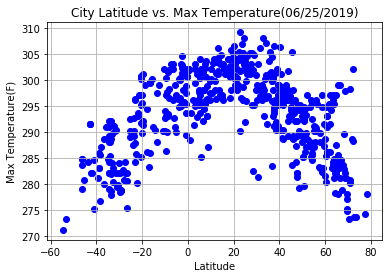

In [24]:
#plotting the graph for latitude vs.Temperatue
x_axis = city_df["Lat"]
y_axis = city_df["Max Temp"]
#plot the labels
plt.title("City Latitude vs. Max Temperature(06/25/2019)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(F)")
plt.scatter(x_axis,y_axis,marker = "o",color = "blue")
plt.grid()
#save the image
plt.savefig("../Images/LatVsTemp.png")
plt.show()


#### Latitude vs. Humidity Plot

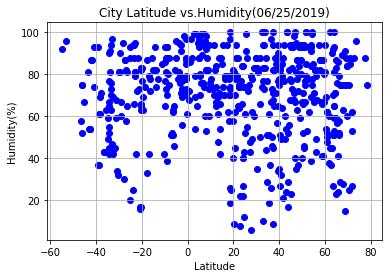

In [25]:
#plot the graph Latitude vs. Humidity plot
x_axis = city_df["Lat"]
y_axis = city_df["Humidity"]
#plot the labels
plt.title("City Latitude vs.Humidity(06/25/2019)")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.scatter(x_axis,y_axis,marker = "o",color = "blue")
plt.grid()
#save the image
plt.savefig("../Images/LatVsHumid.png")
plt.show()


#### Latitude vs. Cloudiness Plot

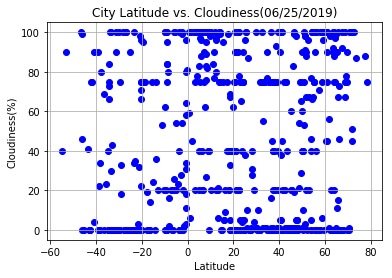

In [26]:
#plot the graph between  Latitude vs Cloudiness
x_axis = city_df["Lat"]
y_axis = city_df["Cloudiness"]
#plot the labels
plt.title("City Latitude vs. Cloudiness(06/25/2019)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.scatter(x_axis,y_axis,marker = "o",color = "blue")
plt.grid()
#save the image
plt.savefig("../Images/LatVscloudy.png")
plt.show()


#### Latitude vs. Wind Speed Plot

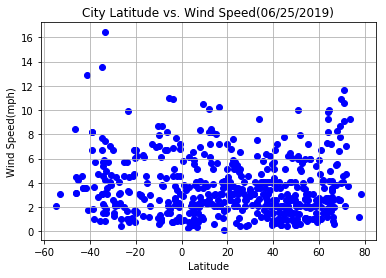

In [27]:
#plot the graph between Latitude vs.Wind Speed plot
x_axis = city_df["Lat"]
y_axis = city_df["Wind Speed"]
#plot the labels
plt.title("City Latitude vs. Wind Speed(06/25/2019)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")
plt.scatter(x_axis,y_axis,marker = "o",color = "blue")
plt.grid()
#save the image
plt.savefig("../Images/LatVsWindSpeed.png")
plt.show()


Data Analysis:

1. As we go from south of the equator(below the equator) to the line of equator Maximun temperature increase up to latitude (30) .
2. AS we go from line of eqautor to north of equator(above the equator) Maximum temperature decreases.
